In [6]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

import seaborn as sns
from matplotlib import pyplot as plt

import time
from fitter import Fitter

In [2]:
import datetime
from binance.client import Client

from config import *
client = Client(api_key, api_secret)

In [3]:
def reduce_arr(arr1):
    div = len(arr1)//30
    # print(div, end=' | ')
    arr2 = []
    for i in range(0, len(arr1)-(div-1), div):
        vals = arr1[i: i+div]
        prom = vals.mean()
        arr2.append(prom)
    # print(len(arr2))
    arr2 = np.array(arr2)
    return arr2

In [4]:
def get_stts(arr2):
    # arr2 = arr.copy()
    x_axis = [i for i in range(len(arr2))]
    models = []
    for i in range(2, 7):
        mymodel = np.poly1d(np.polyfit(x_axis, arr2, i))
        models.append(mymodel)

    myline = np.linspace(1, len(arr2), len(arr2))
    ys = []
    for model in models:
        y_y = model(myline)
        ys.append(y_y)
    
    fig = plt.figure(figsize=(12, 4))
    # plt.plot(arr2)
    plt.plot(arr2)
    for yy in ys:
        plt.plot(yy)
    plt.grid()
    plt.show()
        
    V = [arr2]+ys
    corrs = []
    for v in range(len(V)):
        mini = []
        for w in range(len(V)):
            v_v = V[v]
            w_w = V[w]
            corr, _ = pearsonr(v_v, w_w)
            mini.append(corr)
        corrs.append(mini)
    arr_c = np.array(corrs)
    arr_c = arr_c[arr_c<0.9999999999999]

    f = Fitter(arr2, distributions=['triang'])
    f.fit()
    dx = f.summary(Nbest=15).loc['triang']['sumsquare_error']
    plt.close()
    
    me = ys[0]
    n = len(me)//2
    first = me[0]
    last = me[-1]
    middle = me[n]
    gansta = ''
    if middle>first or middle>last:
        gansta = 'up'
    else:
        gansta = 'down'

    return arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, gansta

In [5]:
def operative_decision(arr2):
    maxi, mini, stdg, mixstd, leemis, gansta = get_stts(arr2)
    cs = .995, .8099, 0.07, 0.1, 0.00099999
    c1 = maxi>cs[0]
    c2 = mini>cs[1]
    c3 = stdg<cs[2]
    c4 = mixstd<cs[3]
    c5 = leemis<cs[-1]
    return [maxi, mini, stdg, mixstd, leemis], int(np.mean([c1, c2, c3, c4, c5])), gansta

In [30]:
import datetime
from datetime import timedelta

In [ ]:
datetime.


In [7]:
day = time.strftime("%Y-%m-%d 00:00:00")
day

'2021-09-15 00:00:00'

In [40]:
date = datetime.datetime.now() - timedelta(days=2)
date = date.strftime("%Y-%m-%d 00:00:00")
date

'2021-09-13 00:00:00'

In [44]:
L = client.futures_historical_klines(
                      symbol='BTCUSDT',
                      # symbol='SCUSDT',
                      interval=client.KLINE_INTERVAL_1MINUTE,
                      start_str=date,
                      # start_str='2021-09-09 22:00:00',
                      # end_str='2021-09-12 09:00:00',
                      # end_str='2021-09-13 09:00:00',
                      #limit=1000
                                    )
len(L)

3827

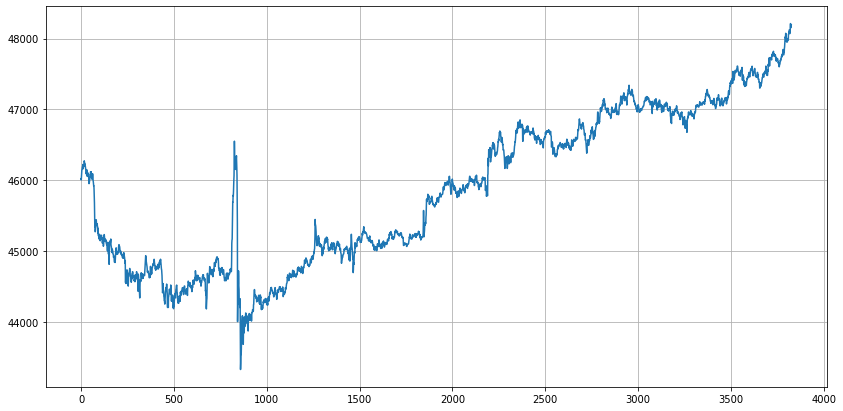

In [45]:
arr = np.array(L, dtype=np.float)
M = arr[:, 3]#[4000:]
fig = plt.figure(figsize=(14, 7))
plt.plot(M)
plt.grid()
plt.show()

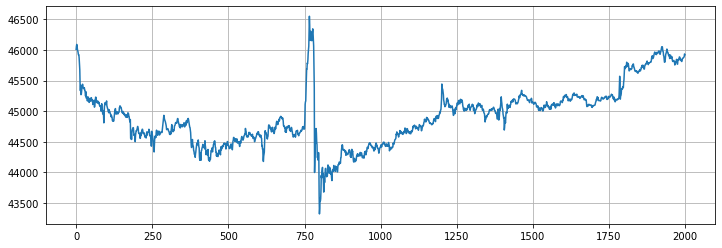

In [65]:
### 1
arr = M[500:2500] # yes 400
fig = plt.figure(figsize=(12, 4))
plt.plot(arr)
plt.grid()
plt.show()

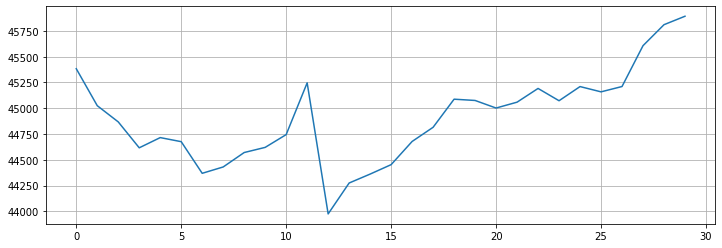

In [66]:
serie = reduce_arr(arr)
fig = plt.figure(figsize=(12, 4))
plt.plot(serie)
plt.grid()
plt.show()

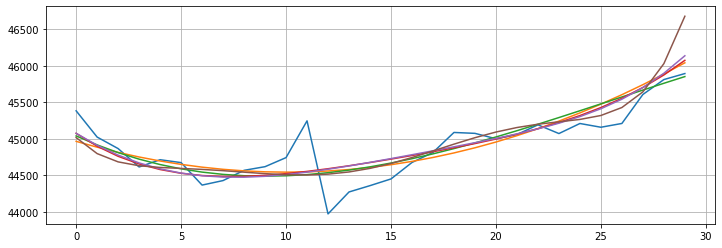

([0.9994831273596478,
  0.8394210566342808,
  0.06459558979462666,
  0.08003103536268352,
  9.902668798391522e-05],
 1,
 'down')

In [92]:
values = operative_decision(serie)
values